<a href="https://colab.research.google.com/github/JezabelEsquivel05/Inteligencia_Artificial_JE/blob/main/Evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [ ]:
import zipfile

# Cambia 'bone_fracture_dataset.zip' con el nombre exacto del archivo ZIP que subiste
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/bone_fracture_dataset/')


In [ ]:
import os
import cv2
import numpy as np

# Ruta donde se extrajo el dataset
dataset_path = '/content/bone_fracture_dataset/'

# Inicializar listas para almacenar imágenes y etiquetas
imagenes = []
etiquetas = []

# Recorrer todas las carpetas y cargar las imágenes
for subdir, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):  # Filtrar solo las imágenes
            ruta_imagen = os.path.join(subdir, file)

            # Cargar imagen con OpenCV
            imagen = cv2.imread(ruta_imagen)
            imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
            imagen = cv2.resize(imagen, (128, 128))  # Redimensionar a 128x128 píxeles
            imagenes.append(imagen)

            # Etiqueta: 1 para fractura, 0 para no fractura
            if 'fracture' in subdir.lower():
                etiquetas.append(1)  # Fractura
            else:
                etiquetas.append(0)  # Sin fractura

# Convertir las listas en arrays de NumPy
imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)

# Normalizar las imágenes (convertir a valores entre 0 y 1)
imagenes = imagenes.astype('float32') / 255.0
imagenes = imagenes.reshape(imagenes.shape[0], 128, 128, 1)  # Convertir a forma (N, 128, 128, 1) para TensorFlow


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Crear el modelo CNN
modelo = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Salida binaria (fractura o no fractura)
])

# Compilar el modelo
modelo.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Resumen del modelo
modelo.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,211,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,267,137 (12.46 MB)

 Trainable params: 3,267,137 (12.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo
historial = modelo.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 226s 947ms/step - accuracy: 0.9968 - loss: 0.0181 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 263s 951ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 258s 935ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 248s 876ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 261s 876ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 262s 878ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 261s 872ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
237/237 ━━━━━

In [ ]:
# Evaluar el modelo
pérdida, precisión = modelo.evaluate(X_test, y_test)
print(f"Precisión en conjunto de prueba: {precisión * 100:.2f}%")


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 237ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Precisión en conjunto de prueba: 100.00%


In [ ]:
def predecir_imagen(imagen_path):
    # Cargar y preprocesar la imagen
    imagen = cv2.imread(imagen_path)
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
    imagen = cv2.resize(imagen, (128, 128))  # Redimensionar a 128x128 píxeles
    imagen = imagen.reshape(1, 128, 128, 1)  # Cambiar la forma para la predicción
    imagen = imagen.astype('float32') / 255.0  # Normalizar la imagen

    # Hacer la predicción
    predicción = modelo.predict(imagen)
    if predicción > 0.5:
        return "Fractura"
    else:
        return "Sin fractura"

# Ejemplo de predicción con una nueva imagen
resultado = predecir_imagen('/content/bone_fracture_dataset/archive (6)/train/fractured/10-rotated1-rotated1-rotated1.jpg')  # Cambia la ruta según tu imagen
print(f"Predicción: {resultado}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicción: Fractura


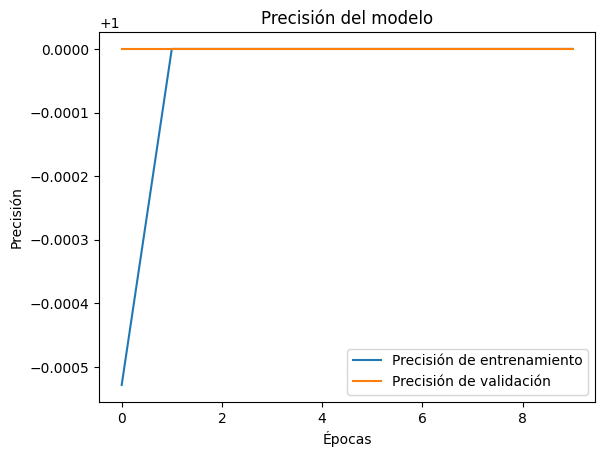

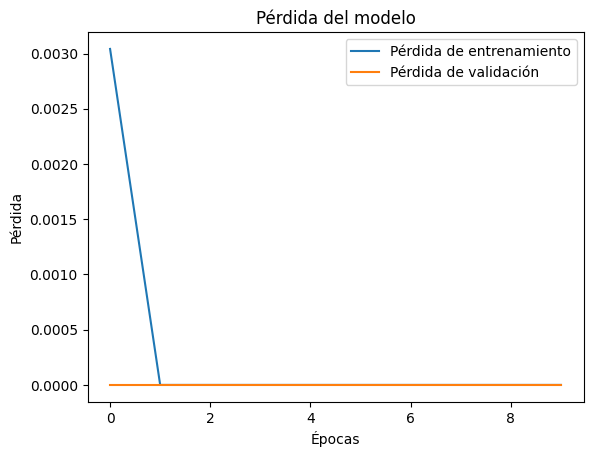

In [ ]:
import matplotlib.pyplot as plt

# Graficar la precisión y la pérdida durante el entrenamiento
plt.plot(historial.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

plt.plot(historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()


In [ ]:
!mkdir fractura

In [ ]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

In [ ]:
import os

# Verificar las carpetas y archivos dentro de tu directorio
imagenes_dir = '/content/bone_fracture_dataset/archive/train'
print(os.listdir(imagenes_dir))  # Esto debería mostrar las carpetas 'fractured' y 'not_fractured' u otras


['not fractured', 'fractured']


In [ ]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import json

# Definir las rutas de las imágenes (ajustar a la ubicación de tus datos)
imagenes_dir = '/content/bone_fracture_dataset/archive/train'  # Cambia esta ruta por la ruta de tu dataset

# Cargar imágenes y etiquetas
def cargar_imagenes(imagenes_dir):
    imagenes = []
    etiquetas = []

    # Cargar imágenes de fractura
    for imagen_name in os.listdir(os.path.join(imagenes_dir, 'fractured')):
        img_path = os.path.join(imagenes_dir, 'fractured', '10-rotated1.jpg')
        img = image.load_img(img_path, target_size=(128, 128), color_mode="grayscale")
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = img.astype('float32') / 255.0  # Normalización
        imagenes.append(img)
        etiquetas.append(1)  # 1 indica fractura

    # Cargar imágenes sin fractura
    for imagen_name in os.listdir(os.path.join(imagenes_dir, 'not fractured')):
        img_path = os.path.join(imagenes_dir, 'not fractured', '10.jpg')
        img = image.load_img(img_path, target_size=(128, 128), color_mode="grayscale")
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = img.astype('float32') / 255.0  # Normalización
        imagenes.append(img)
        etiquetas.append(0)  # 0 indica sin fractura

    return np.array(imagenes), np.array(etiquetas)

# Cargar las imágenes
imagenes, etiquetas = cargar_imagenes(imagenes_dir)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

# Crear el modelo
modelo = Sequential([
    Flatten(input_shape=(128, 128, 1)),  # Aplanar la imagen
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Salida binaria: fractura o no fractura
])

# Compilar el modelo
modelo.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
historial = modelo.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Crear una carpeta para guardar los modelos
if not os.path.exists('models'):
    os.makedirs('models')

# Guardar el modelo en formato .h5
modelo.save('models/modelo_fractura.h5')

# Guardar el archivo de configuración en formato .json
config = {
    "input_size": (128, 128),
    "epochs": 10,
    "loss": "binary_crossentropy",
    "optimizer": "Adam",
    "metrics": ["accuracy"]
}

# Guardar la configuración en un archivo .json
with open('models/config.json', 'w') as json_file:
    json.dump(config, json_file)

print("Modelo entrenado y guardado como .h5 y .json en la carpeta 'models'.")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9832 - loss: 0.0225 - val_accuracy: 1.0000 - val_loss: 5.7107e-12
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 1.0000 - loss: 5.7539e-12 - val_accuracy: 1.0000 - val_loss: 5.7107e-12
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 1.0000 - loss: 5.7693e-12 - val_accuracy: 1.0000 - val_loss: 5.7107e-12
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 1.0000 - loss: 5.8396e-12 - val_accuracy: 1.0000 - val_loss: 5.7107e-12
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 1.0000 - loss: 5.6007e-12 - val_accuracy: 1.0000 - val_loss: 5.7107e-12
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 1.0000 - loss: 5.7763e-12 - val_accuracy: 1.0000 - val_loss: 5.7107e-12
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 1.0000 - loss: 5.8645e-12 - val_accuracy: 1.0000 - val_loss: 5.7107e-12
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 

Modelo entrenado y guardado como .h5 y .json en la carpeta 'models'.


In [ ]:
pip install opencv-python


In [ ]:
import cv2
import numpy as np

# Función para capturar una imagen desde la cámara USB
def capture_image_from_usb_camera(camera_index=0):
    # 'camera_index' puede ser 0 o 1 dependiendo de cuántas cámaras USB estén conectadas
    cap = cv2.VideoCapture(camera_index)

    if not cap.isOpened():
        print("No se puede acceder a la cámara USB.")
        return None

    # Capturamos un solo frame
    ret, frame = cap.read()

    if ret:
        # Mostramos la imagen capturada
        cv2.imshow('Imagen de la cámara', frame)

        # Esperamos una tecla para cerrar la ventana de imagen
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    # Liberamos la cámara después de capturar la imagen
    cap.release()

    if ret:
        return frame
    else:
        return None

# Preprocesar la imagen (ajusta esto según cómo procesas las imágenes para tu modelo)
def preprocess_image(image):
    # Redimensionar la imagen al tamaño esperado por el modelo
    image_resized = cv2.resize(image, (224, 224))  # Ajusta el tamaño según tu modelo

    # Normalizar la imagen (si es necesario)
    image_normalized = image_resized / 255.0  # Asumiendo que usas normalización [0, 1]

    # Expande las dimensiones para que sea compatible con la entrada del modelo (batch size, altura, anchura, canales)
    image_expanded = np.expand_dims(image_normalized, axis=0)

    return image_expanded

# Suponiendo que ya tienes tu modelo cargado
def predict_with_model(model, image):
    # Preprocesar la imagen antes de hacer la predicción
    processed_image = preprocess_image(image)

    # Realizar la predicción
    prediction = model.predict(processed_image)

    return prediction

# Capturamos la imagen desde la cámara USB
image = capture_image_from_usb_camera()

if image is not None:
    # Realizamos la predicción con el modelo
    prediction = predict_with_model(model, image)

    print("Predicción:", prediction)


No se puede acceder a la cámara USB.


In [ ]:
# Instalamos las bibliotecas necesarias
from IPython.display import display, Javascript
import cv2
import numpy as np
import tensorflow as tf  # Si usas TensorFlow

# Función para capturar una imagen desde la cámara web en Google Colab
def capture_image_from_webcam():
    # Código JavaScript que abrirá la cámara en el entorno de Colab
    display(Javascript('''
    async function takePhoto() {
        const video = document.createElement('video');
        document.body.appendChild(video);

        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;

        await new Promise((resolve) => { video.onloadedmetadata = () => { resolve(video); }; });

        video.play();

        // Esperar un momento para que la cámara cargue
        await new Promise((resolve) => setTimeout(resolve, 1000));

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;

        canvas.getContext('2d').drawImage(video, 0, 0);

        const imageData = canvas.toDataURL('image/png');

        // Detener la cámara
        stream.getTracks().forEach(track => track.stop());

        video.remove();
        canvas.remove();

        return imageData;
    }
    takePhoto().then(dataUrl => {
        google.colab.kernel.invokeFunction('notebook.take_picture', [dataUrl], {});
    });
    '''))

# Función para recibir la imagen de la cámara y convertirla en formato que OpenCV pueda usar
from PIL import Image
from io import BytesIO
import base64

def handle_image_data(image_data):
    # Decodificar la imagen desde base64
    image_data = image_data.split(',')[1]
    image_bytes = BytesIO(base64.b64decode(image_data))
    img = Image.open(image_bytes)

    # Convertir la imagen PIL a un formato que OpenCV pueda procesar
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # Mostrar la imagen en Google Colab
    cv2.imshow("Captured Image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return img

# Función de predicción con el modelo (ajusta según tu modelo)
def predict_with_model(model, image):
    # Preprocesar la imagen para el modelo (ajusta según las dimensiones esperadas)
    image_resized = cv2.resize(image, (224, 224))  # Ajusta el tamaño según tu modelo
    image_normalized = image_resized / 255.0
    image_expanded = np.expand_dims(image_normalized, axis=0)

    # Realizar la predicción
    prediction = model.predict(image_expanded)
    return prediction

# Registrar la función 'handle_image_data' para ser llamada desde el JavaScript
from google.colab import output
output.register_callback('notebook.take_picture', handle_image_data)

# Llamar a la función para capturar la imagen
capture_image_from_webcam()


<IPython.core.display.Javascript object>